<a href="https://colab.research.google.com/github/nayun12/Tobigs_17/blob/main/%5B%ED%88%AC%EB%B9%85%EC%8A%A4_17%EA%B8%B0_%EC%A0%95%EA%B7%9C%EC%84%B8%EC%85%98%5D_2%EC%A3%BC%EC%B0%A8_Regression_%EA%B3%BC%EC%A0%9C_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Tobigs/2주차 Regression/assignment3_creditcard.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,0.394940,1.935899,-0.359235,1.822466,-0.054693,0.857551,-0.053336,0.529098,0.159752,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,-1.159036,0.719861,0.622591,-0.157846,-0.373298,-0.515740,-0.117206,-0.569763,0.644970,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,-0.703073,0.588971,-0.146823,-0.181353,-0.690156,-0.028327,0.410035,-0.828869,-0.885471,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,1.136838,0.648191,-0.468076,1.016010,0.206836,-0.138604,-0.066788,0.459306,0.663398,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,-1.352709,-0.995678,-0.887039,0.732821,-0.557246,-2.412225,0.200509,0.823963,-0.531789,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


# data 분포 확인

In [ ]:
features = data.iloc[:, :-1]
target = data.iloc[:, -1]

In [ ]:
pd.set_option('display.max_columns', 40)
features.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,0.033738,-0.047544,0.014048,-0.053556,-0.011562,-0.031559,-0.045020,-0.005966,0.007183,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,1.096583,1.208918,0.995720,1.193859,0.916783,1.000876,1.186014,0.892478,0.827420,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,-4.339319,-18.431131,-3.844974,-19.214325,-3.894020,-13.303888,-24.019099,-9.335193,-4.619034,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,-0.748920,-0.421077,-0.633399,-0.449537,-0.597618,-0.478844,-0.494037,-0.497440,-0.459073,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,-0.010467,0.137410,-0.003826,0.037809,0.041502,0.059667,-0.067213,-0.000928,0.002111,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,0.760396,0.612790,0.675571,0.485859,0.637263,0.517753,0.403942,0.514982,0.467781,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,12.018913,4.574082,3.685570,7.667726,3.680272,6.098529,9.207059,4.054462,5.228342,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133


In [ ]:
zero_percent = target.value_counts()[0] / target.count() * 100
one_percent = target.value_counts()[1] / target.count() * 100

print(f'0의 비율: {zero_percent:.2f}')
print(f'1의 비율: {one_percent:.2f}')

0의 비율: 99.14
1의 비율: 0.86


타겟의 분포는 매우 불균형적이다.
따라서 정확도를 평가하는 기준은 accuracy가 아닌 AUC, 재현율과 정밀도 등을 활용할 것이다.

# Model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 11, stratify = target)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns= features.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns= features.columns)

In [ ]:
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000
mean,0.926686,0.663471,0.882930,0.319687,0.561089,0.493165,0.530188,0.662517,0.622776,0.614620,0.267161,0.799282,0.512659,0.712867,0.500661,0.683648,0.709765,0.695137,0.469569,0.449111,0.441058,0.515345,0.791704,0.407235,0.727485,0.417929,0.394958,0.391850
std,0.062265,0.025812,0.050316,0.084728,0.020232,0.030431,0.019108,0.023287,0.052778,0.031793,0.066871,0.052261,0.132456,0.044248,0.123994,0.051470,0.036742,0.066959,0.083762,0.015419,0.017671,0.043002,0.013344,0.090870,0.056244,0.090105,0.021743,0.012177
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.899298,0.653623,0.858499,0.269460,0.552007,0.476045,0.523603,0.658965,0.592864,0.602023,0.219487,0.782824,0.426971,0.698223,0.421536,0.660664,0.695617,0.658299,0.422841,0.444648,0.436277,0.484009,0.788399,0.353899,0.693259,0.356983,0.390976,0.389670
50%,0.927768,0.663862,0.889474,0.317277,0.560789,0.487133,0.531347,0.662833,0.621067,0.613177,0.264354,0.807267,0.510317,0.716100,0.508413,0.688316,0.709157,0.695663,0.469319,0.447728,0.440304,0.515776,0.791626,0.413327,0.729990,0.407618,0.394903,0.392255
75%,0.967420,0.675343,0.913668,0.361570,0.569692,0.502279,0.537999,0.668071,0.651928,0.627171,0.311502,0.827919,0.600730,0.732758,0.587930,0.711918,0.723882,0.734303,0.516286,0.451824,0.444637,0.545945,0.795029,0.473189,0.765926,0.462893,0.399868,0.395014
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)

pred = lg.predict(X_test)


pred_proba_c1 = lg.predict_proba(X_test)[:, -1].reshape(-1,1)

# Evaluate

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix을 함수로 구현
def get_clf_eval(y_test, y_predict, title):
    tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
    print("-"*90)
    print(f'{title}')
    print("-"*90)
    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_predict))
    print("-"*90)
    accuracy = (tp+tn) / (tp+fn+fp+tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    print(f'Accuracy : {accuracy:.5f}, Precision : {precision:.5f}, Recall : {recall:.5f}, F1 : {f1:.5f}')
    print("-"*90)

get_clf_eval(y_test, pred, 'Logistic Regression')

------------------------------------------------------------------------------------------
Logistic Regression
------------------------------------------------------------------------------------------
Confusion Matrix
[[5685    2]
 [  19   30]]
------------------------------------------------------------------------------------------
Accuracy : 0.99634, Precision : 0.93750, Recall : 0.61224, F1 : 0.74074
------------------------------------------------------------------------------------------


0(실제값)을 0(예측값)으로 예측한 TN의 경우 5685개


1(실제값)을 1(예측값)로 예측한 TP의 경우 30개


0(실제값)을 1(예측값)로 잘 못 에측한 FP의 경우 2개


1(실제값)을 0(예측값)로 잘 못 예측함 FN의 경우 19개


-> 모델의 성능은 F1으로 평가한다.(정밀도, 재현율의 관계를 결합)

결론은 현재 모델의 경우 재현율과 정밀도가 서로 교차하는 지점인 임계치 0.05를 기준으로 모델을 활용하는 것이 좋다고 생각된다.



In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, pred_proba_c1)
print(f'AUC Score : {auc:.5f}')

AUC Score : 0.99433


AUC Score의 경우 1에 가까울 수록 매우 높은 성능을 가진다. 현재 데이터셋에는 AUC Score 보다는 F1을 활용하여 평가하는 것이 더 좋을 것으로 보인다.

#  Target을 oversampling 하여 불균형을 해소하기

In [ ]:
from imblearn.over_sampling import RandomOverSampler
X_resampled, y_resampled = RandomOverSampler(random_state=0).fit_resample(features, target)


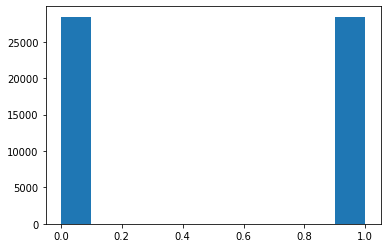

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline 
plt.hist(y_resampled)
plt.show()

In [ ]:
X_resampled.shape,y_resampled.shape

((56864, 28), (56864,))

In [ ]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state = 11)


In [ ]:
X_train_over.shape,X_test_over.shape,y_train_over.shape,y_test_over.shape

((45491, 28), (11373, 28), (45491,), (11373,))

In [ ]:
from pandas.compat.numpy.function import MINMAX_DEFAULTS
X_train_over = scaler.fit_transform(X_train_over)
X_test_over = scaler.fit_transform(X_test_over)

In [ ]:
X_train_over.shape,X_test_over.shape,y_train_over.shape,y_test_over.shape

((45491, 28), (11373, 28), (45491,), (11373,))

In [ ]:
lg_over = LogisticRegression()
lg_over.fit(X_train_over, y_train_over)

pred_over = lg_over.predict(X_test_over)


pred_proba_c1 = lg_over.predict_proba(X_test_over)[:, -1].reshape(-1,1)

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix을 함수로 구현
def get_clf_eval(y_test, y_predict, title):
    tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
    print("-"*90)
    print(f'{title}')
    print("-"*90)
    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_predict))
    print("-"*90)
    accuracy = (tp+tn) / (tp+fn+fp+tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    print(f'Accuracy : {accuracy:.5f}, Precision : {precision:.5f}, Recall : {recall:.5f}, F1 : {f1:.5f}')
    print("-"*90)

get_clf_eval(y_test_over, pred_over, 'Logistic Regression')

------------------------------------------------------------------------------------------
Logistic Regression
------------------------------------------------------------------------------------------
Confusion Matrix
[[5710   56]
 [ 469 5138]]
------------------------------------------------------------------------------------------
Accuracy : 0.95384, Precision : 0.98922, Recall : 0.91635, F1 : 0.95139
------------------------------------------------------------------------------------------


F1 성능지표가 매우 향상되었다.